In [35]:
import os
import pandas as pd
import cv2
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [36]:
train = pd.read_excel('Data Latih BDC.xlsx')
test = pd.read_excel('Data Uji BDC.xlsx')

In [37]:
train = train[['ID', 'label', 'nama file gambar']]
test = test[['ID', 'nama file gambar']]

In [38]:
train.head()

,ID,label,nama file gambar
0,71,1,71.jpg
1,461,1,461.png
2,495,1,495.png
3,550,1,550.png
4,681,1,681.jpg


In [39]:
train = train[:15]
test = test[15:20]

In [40]:
train_dir = "../satria data/File Gambar Data Latih/"
test_dir = "../satria data/File Gambar Data Uji/"
X_tr = []
Y_tr = []
imges = train['nama file gambar'].values
for img_id in tqdm_notebook(imges):
    X_tr.append(cv2.imread(train_dir + img_id))    
    Y_tr.append(train[train['nama file gambar'] == img_id]['label'].values[0])  

C:\Users\daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [41]:
X_tst = []
Y_tst = []
imges = train['nama file gambar'].values
for img_id in tqdm_notebook(imges):
    X_tst.append(cv2.imread(train_dir + img_id))    
    Y_tst.append(train[train['nama file gambar'] == img_id]['label'].values[0])  

C:\Users\daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [47]:
#class_names = [0,1]

#plt.figure(figsize=(10,10))
#for i in range(25):
#    plt.subplot(5,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
#    plt.grid(False)
#    plt.imshow(X_tr[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#    plt.xlabel(class_names[Y_tr[i]])
#plt.show()

In [22]:
X_train = []
for i in range(len(X_tr)):
    X_train.append(X_tr[i]/255)
    
X_test = []
for i in range(len(X_tst)):
    X_test.append(X_tst[i]/255)

1


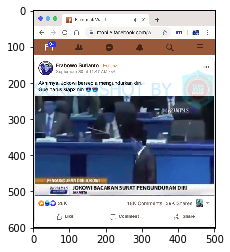

In [34]:
plt.imshow(X_train[10])
print(Y_tr[10])

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_tr, epochs=10)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.int64'>"})